# Informe de Laboratorio 1 - Grupo 4
--------------------------------------------------------------------

## Integrantes

- Nicolas Diaz Montaña - n.diaz9 - 202021006

- Julio Alexander Peña Tovar - 

- Sebastian Enrique Casanova Ospina - s.casanovao - 202115116


## Objetivos

El siguiente informe tiene los objetivos de:

- Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
<br><br>
- Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
<br><br>
- Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
<br><br>
- Recomendar el algoritmo más adecuado a la organización con base en una tabla comparativa que muestre el rendimiento de los tres modelos construidos.
<br><br>
- Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización. Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## 1. Entendimiento de Datos

### 1.1. Enunciado del Negocio

En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.
<br>
<br>
AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones.

### 1.2. Carga de librerias necesarias y carga de datos

Lo primero ha realizar es descargar las librerias correspondientes que se va a utilizar para la completa realiacion del laboratorio. A su vez, se descargaran los datos del csv donde se encuentra la informacion de los clientes. 

In [126]:
!pip install scikit-learn-extra

In [127]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn_extra.cluster import KMedoids

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Se cargan los datos. 
# Recuerde ajustar el directorio si lo requiere para encontrar los datos
df_customer=pd.read_csv("data\Agrupación_Customer_Data.csv", sep=',', encoding = "ISO-8859-1")

Una vez realizado la carga de los dato empezaremos con el entedimiento de los datos para ver como se ajustan al contexto de negocio, ademas de hacer un analisis para comprobar la calidad de los mismos.

### 1.3. Perfilamiento de datos

In [128]:
df_customer.shape

(8961, 18)

In [129]:
df_customer.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [130]:
# Revisar las características de los datos: completitud y tipo de dato
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

**Análisis** 
<br><br>
Aqui podemos notar que puede haber algunas incongruencias como que existen columnas con datos nulos.

In [131]:
# Resumen de los estadisticos de las variables numéricas
df_customer.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [132]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_customer.select_dtypes(include = ['object']).columns
name_cols_non_number

#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_customer[name_cols_non_number].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


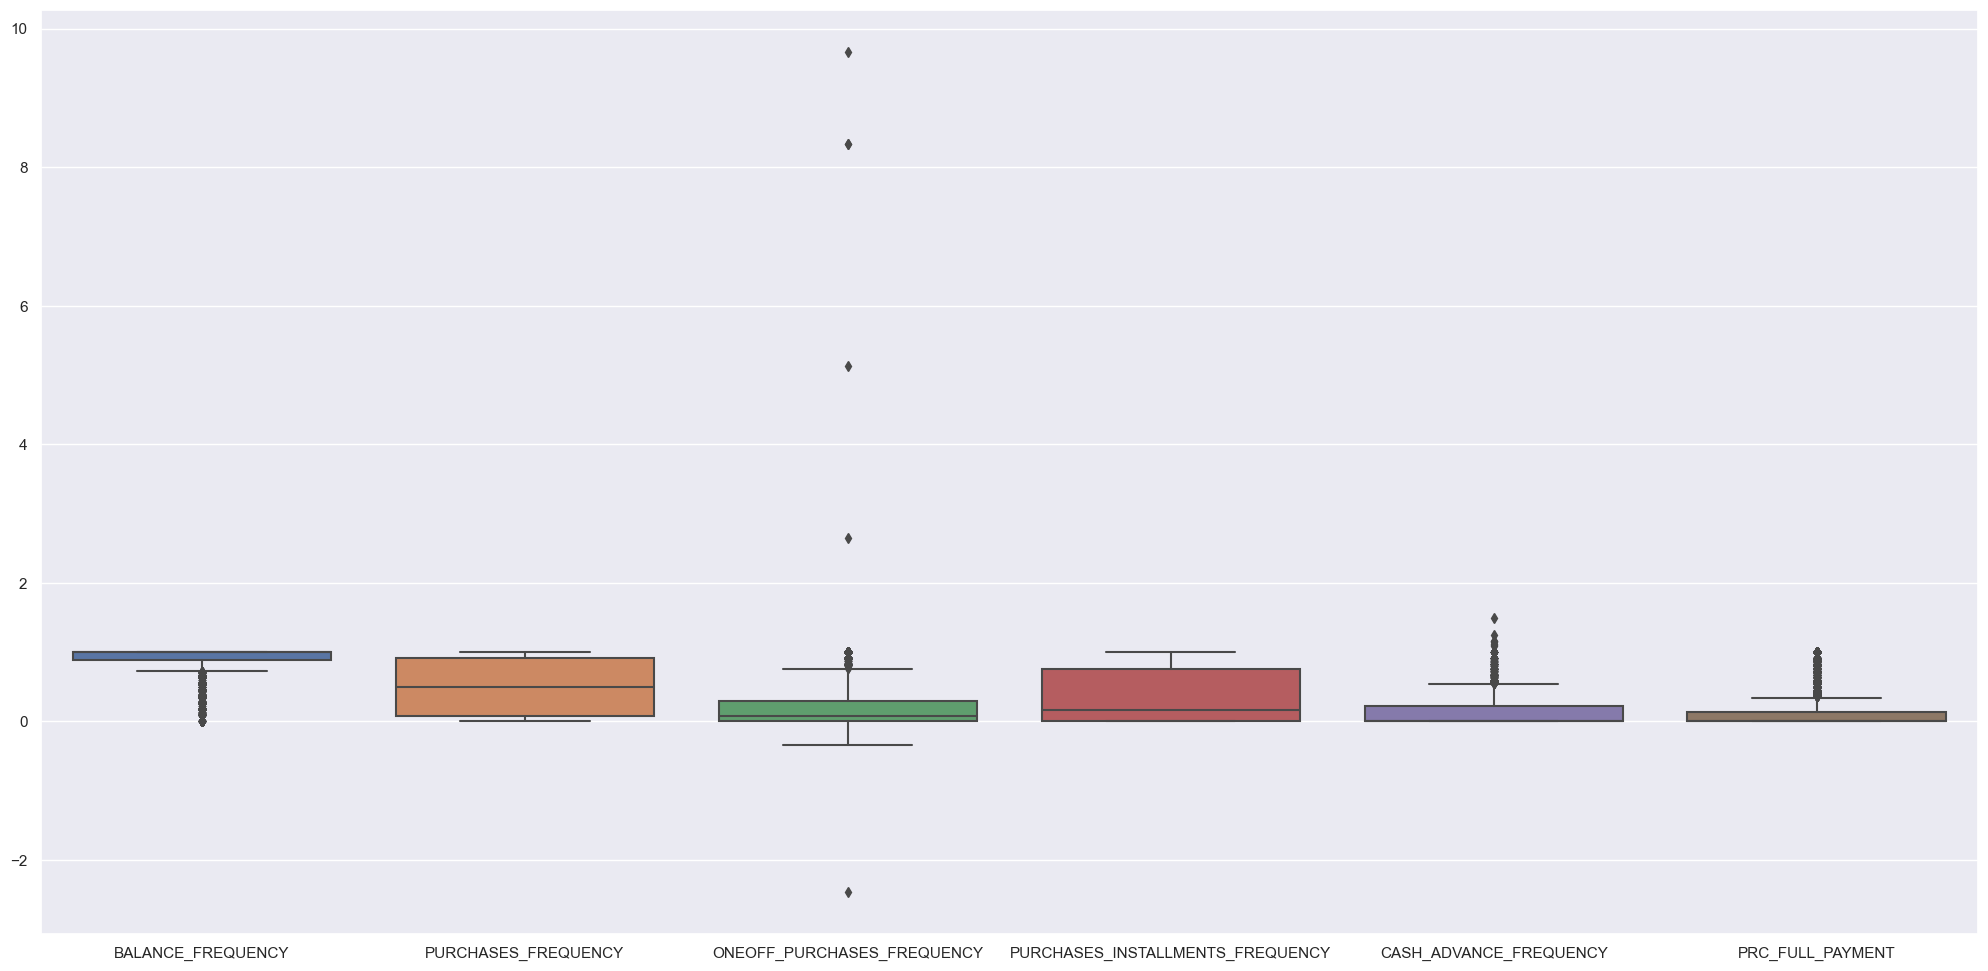

In [133]:
#Seleccion de las frecuencias de los balances de la cuenta y los tipos de de compra
name_cols_frequency = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

#Visualización de todas las variables numéricas de iipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=df_customer[name_cols_frequency], orient="v")

**Análisis** 
<br><br>
Aqui se puede observar que hay varios valores atipicos que se evidencia en las columnas de Compra unica y adelante en efectivo. Donde algunos valores sobrepasan el limite establecido del rango entre [0,1] que representa el porcentaje de frecuencia. Por ejemplo, en la columna de Compra unica hay un valor llega casi a 10, lo que significaria una frecuencia del 1000%.

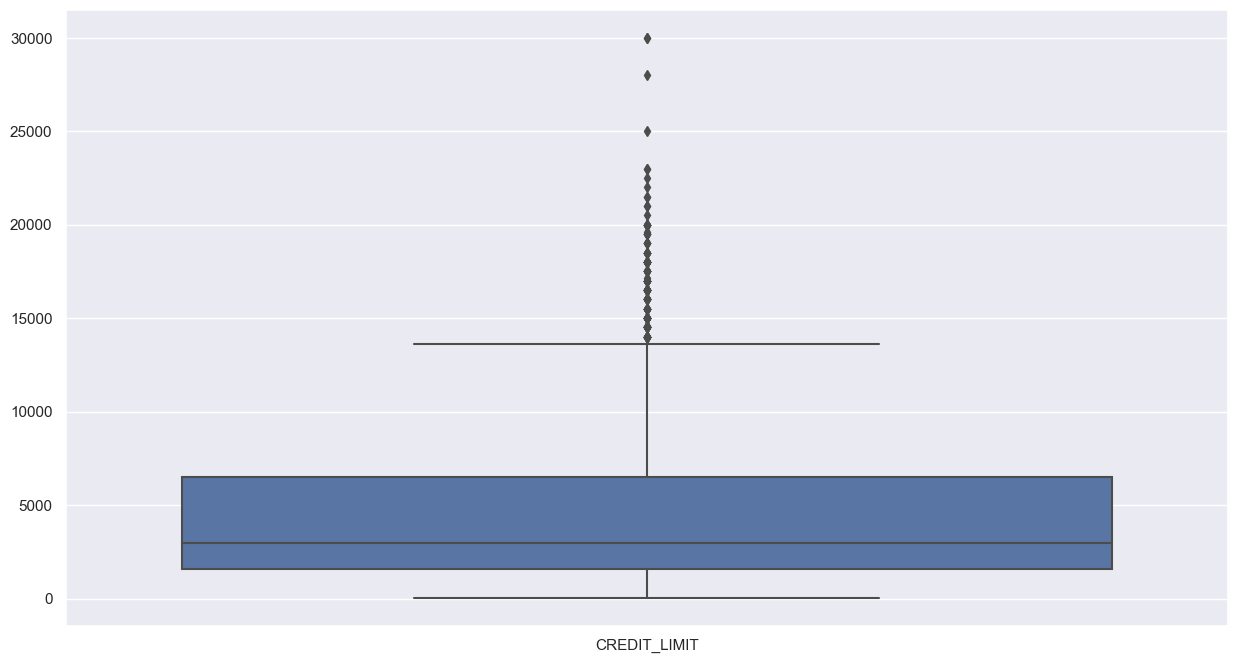

In [134]:
name_col_limit = ["CREDIT_LIMIT"]

#Visualización 
fig=plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_customer[name_col_limit], orient="v")

**Análisis** 
<br><br>
Aqui se puede observar que hay algunas instancias que se estan muy por encima del promedio, estas lo pueden afectar a los modelos de manera que los puede sesgar. Esto s datos superiores a la media se pueden juntar en un mismo valor de la media o mayor a la media. Tambien se podrian eliminar ya que podrian considerarse no necesarios.

In [135]:
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

**Análisis** 
<br><br>
Aqui podemos notar que tenemos datos que no tiene sentido con respecto al contexto y descripcion de la columna TENURE, la cual describe por cuanto tiempo ha sido cliente esa instancia. Los datos negativos son los que provocan un problema.

In [136]:
# Vamos relaciones entre las variables numericas, en este momento excluiremos BALANCE por lo que tiene instancias de datos
# que no son de tipo numerico y CUST_ID no tiene relevancia en el analisis.

df_customer_cols_sels=df_customer.copy().drop(columns=["CUST_ID","BALANCE"])

<Axes: >

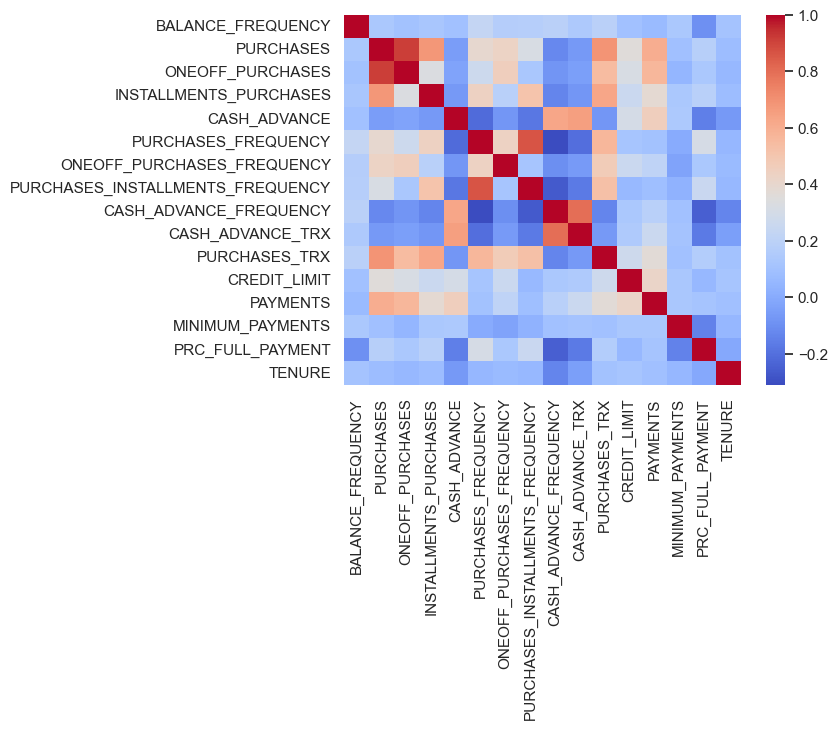

In [137]:
from sklearn.preprocessing import MinMaxScaler

# Aqui normalizaremos los datos
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_customer_cols_sels), columns=df_customer_cols_sels.columns)

# Se hara una matriz de correlacion para que se puede comparar que tanto se relacionan las columnas entre si
correlation_matrix = normalized_df.corr()

# En esta gráfica de tipo heatmap va mostrar las correlaciones
sns.heatmap(correlation_matrix, cmap='coolwarm')

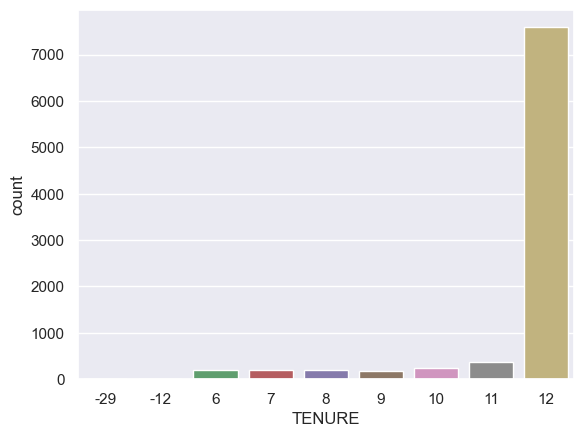

In [138]:
# Visualmente ver la cantidad de valores y de filas x valor
ax = sns.countplot(x='TENURE', data=df_customer)

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


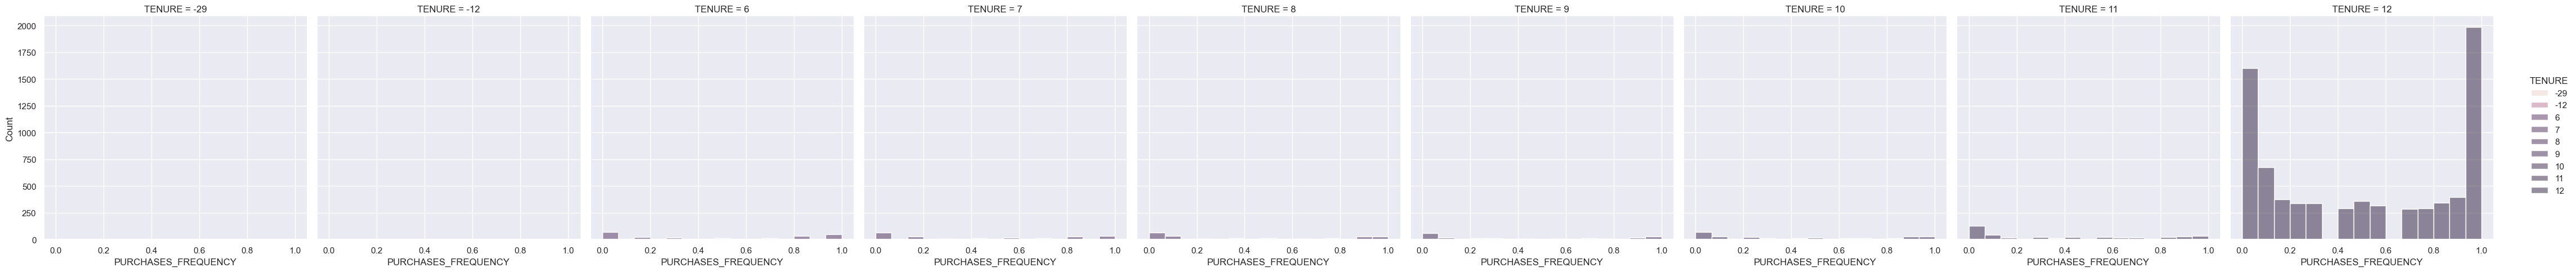

In [139]:
sns.displot(data=df_customer, x="PURCHASES_FREQUENCY", hue="TENURE", col="TENURE")

**Análisis**

En las anterior graficas podemos ver que la mayoria de los datos se encuentran en los clientes que han estado 12 meses con la empresa, se podrian cosiderar no necesarios a los usuarios que estan por debajo de los 12 meses ya que no representan un gran procentaje de la informacion. Aun asi pueden ser utiles para un analisis puramente de "nuevos clientes".

## 1.4. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez. En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.3.1 Completitud - Análisis de valores nulos o vacíos

In [140]:
# Cálculo de porcentaje de valores nulos por columna
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.034929
ONEOFF_PURCHASES_FREQUENCY          0.001451
CASH_ADVANCE                        0.001116
CREDIT_LIMIT                        0.000781
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

En este punto se puede evidencuar que 4 (MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT) columnas tienen un porcentaje mayor a 0 de datos vacios, lo cual significa que algunas instancias de usuarios tienen huecos en esas columnas. El que mas sobresale es MINIMUM_PAYMENTS con un porcentaje del 0.034929.

Aun asi, se podria argumentar que las instancias vacias de MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE pueden ser candidatas a ser remplazadas por la  0 por que puede ser que no el usuario no ha hecho ese tipo de movimientos. En cambio CREDIT_LIMIT, puede que no se incluya en los modelos a realizar pero aun asi se podria tener en cuenta remplazar esos valores de la media para no perder la informacion de esas filas.

### 1.3.2. Unicidad

Aqui no puede haber excusas de que hayan duplicados de filas debido al contexto del negocio y a la informacion prevista. En este caso, no puede haber dos clientes con el mismo ID que seria una incongruencia aunque cierta informacion se puede repetir en otras columnas. Lo ideal seria elminarlas para que no generen problemas a la hora de hacer los modelos.

In [141]:
print('Total de filas repetidas:', df_customer.duplicated(keep = False).sum())

Total de filas repetidas: 20


Aqui podemos evidenciar que hubo 20 filas repetidas de 8961.

### 1.3.3. Consistencia

In [142]:
# Aqui revisaremos los valores de variable TENUR, la cual hace referencia del tiempo en meses que lleva el cliente con la empresa.
# Como ya se habia mencionado antes, los valores negativos no tienen mucho sentido por que no se puede decir que un cliente ha estado -29 meses con la empresa.
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

In [143]:
# Ver los valores maximos y minimos de las columnas ONEOFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY 
cols_select=["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
df_customer_cols_sels=df_customer[cols_select].copy()

df_customer_cols_sels.describe().loc[['min', 'max']]

,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,-2.45640,0.0
max,9.66667,1.5


Segun el diccionario de datos, las columnas de frecuencia solo tiene un rango de 0 a 1 dado a que representan un porcentaje del 0 al 100. Pero como se puede evidenciar, estas dos columnas exceden esos limites en especial ONEOFF_PURCHASES_FREQUENCY.

### 1.3.4. Validez

In [144]:
column_type = df_customer['BALANCE'].dtype
print("El tipo de dato que deberia ser BALANCE es float64 pero segun los datos es: {}".format(column_type))

El tipo de dato que deberia ser BALANCE es float64 pero segun los datos es: object


## 2. Preparacion de los datos


### 2.1 Corrección de Validez


Lo primero que debemos hacer para preparar nuestro conjunto de datos es cambiar el tipo de dato de la columna BALANCE. Como vimos previamente al revisar la información de los datos, esta columna tiene como tipo de dato 'object'. Sin embargo, al remitirnos al diccionario de datos y revisar el documento CSV, podemos observar que estos datos son de tipo 'float64', ya que corresponden al promedio del balance mensual. 

In [145]:
# Se cambia el tipo de dato de la columna BALANCE de Object a Float64
df_customer = df_customer[df_customer['BALANCE'].str.contains(r'^[+-]?\d*\.?\d+$')]
df_customer['BALANCE'] = (df_customer["BALANCE"]).astype("float")
print(df_customer['BALANCE'])


0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8956      28.493517
8957      19.183215
8958      23.398673
8959      13.457564
8960     372.708075
Name: BALANCE, Length: 8955, dtype: float64


**Análisis** 
<br><br>
Al convertir la columna a float pudimos observar que habian unos pocos valores que estaban mal escritos por lo que se procedio a borrar esas filas.

### 2.2 Corrección de Completitud



2.1.1 Antes de borrar las filas con datos nulos debemos considerar que en una de las columnas la cantidad de datos de este tipo es bastante significativa por lo que seria un error hacerlo. La columna a la que nos referimos es la de pagos minimos, en esta columna el pago minimo es de 0, por lo que asumiermos que estos valores nulos es que el cliente no realizo ningun pago y los llenaremos con cero. 

In [146]:
df_customer['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

A continuacion podemos observar que ya no hay valores nulos en la columna MINIMUM_PAYMENTS


In [147]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8955 non-null   object 
 1   BALANCE                           8955 non-null   float64
 2   BALANCE_FREQUENCY                 8955 non-null   float64
 3   PURCHASES                         8955 non-null   float64
 4   ONEOFF_PURCHASES                  8955 non-null   float64
 5   INSTALLMENTS_PURCHASES            8955 non-null   float64
 6   CASH_ADVANCE                      8945 non-null   float64
 7   PURCHASES_FREQUENCY               8955 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8942 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8955 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8955 non-null   float64
 11  CASH_ADVANCE_TRX                  8955 non-null   int64  
 12  PURCHASES_T

2.2.2 Se eliminan todas las filas con valores nulos en alguna de las variables.

A diferencia de la variable BALANCE, la cantidad de valores nulos no es significativa para las otras variables por lo que procederemos a borrarlas.

In [148]:
#Se mira porcentajes de nulos ahroa
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

ONEOFF_PURCHASES_FREQUENCY          0.001452
CASH_ADVANCE                        0.001117
CREDIT_LIMIT                        0.000782
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
MINIMUM_PAYMENTS                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

In [149]:
df_customer.dropna(inplace = True)

Como mostraremos adelante no hay valores nulos en ninguna de las columnas ahora.

In [150]:
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

CUST_ID                             0.0
BALANCE                             0.0
PRC_FULL_PAYMENT                    0.0
MINIMUM_PAYMENTS                    0.0
PAYMENTS                            0.0
CREDIT_LIMIT                        0.0
PURCHASES_TRX                       0.0
CASH_ADVANCE_TRX                    0.0
CASH_ADVANCE_FREQUENCY              0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_FREQUENCY                 0.0
CASH_ADVANCE                        0.0
INSTALLMENTS_PURCHASES              0.0
ONEOFF_PURCHASES                    0.0
PURCHASES                           0.0
BALANCE_FREQUENCY                   0.0
TENURE                              0.0
dtype: float64

### 2.3 Corrección de la Unicidad




2.3.1 Borrar filas que esten completamente duplicadas.
Despues de identificadas las filas cuyos valores en cada una de las variables sean iguales, se procede a borrar los duplicados.

In [151]:
# Se eliminan las filas duplicadas 
df_customer.drop_duplicates(subset = df_customer.columns[:], inplace = True)

Como se muestra a continuacion ya no hay filas exactamente iguales la una de la otra.

In [152]:
print('Total de filas repetidas:', df_customer.duplicated(keep = False).sum())

Total de filas repetidas: 0


### 2.4 Correccion de Consistencia



2.4.1
En primer lugar vamos a hacer que los valores para las columnas ONEOFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY tengan sentido, es decir ya que son porcentajes cuyos valores deben ir estrictamente entre 0 y 1 borraremos los valores que no cumplen con este requisito.

In [153]:
columnasSeleccionadas= ["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
for columna in columnasSeleccionadas:
    df_customer = df_customer[(df_customer[columna] >= 0) & (df_customer[columna] <= 1)]

Ahora mostramos la informacion de ambas columnas y veremos que todos sus valores estan dentro de los rangos establecidos.

In [154]:
cols_select=["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
df_customer_cols_sels=df_customer[cols_select].copy()

df_customer_cols_sels.describe().loc[['min', 'max']]

,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,0.0,0.0
max,1.0,1.0


2.4.2 Para las columnas BALANCE Y TERNURE tenemos que no pueden haber valores negativos, ya que no tiene sentido tener un balance de tarjeta negativa ni una cantidad de meses como cliente negativo, por lo que las filas cuyos valores para estas variables sean menores a cero son borradas.

In [155]:
df_customer = df_customer[(df_customer["TENURE"] >= 0)]
df_customer = df_customer[(df_customer["BALANCE"] >= 0)]

A continuacion se muestra la informacion de ambas columnas para que se pueda apreciar que no hay negativos en ninguna de ellas.

In [156]:
cantidad_negativos = (df_customer['BALANCE'] < 0).sum()

print("Cantidad de valores negativos en la columna BALANCE:", cantidad_negativos)

Cantidad de valores negativos en la columna BALANCE: 0


In [157]:
cantidad_negativos = (df_customer['TENURE'] < 0).sum()

print("Cantidad de valores negativos en la columna TENURE:", cantidad_negativos)

Cantidad de valores negativos en la columna TENURE: 0


In [158]:
# Realizar una copia del datafram para no perjudicar los datos
df_copia = df_customer.copy()

# Calcula la media y la desviación estándar de las columnas balance y avg_spend en todo el DataFrame
mean_balance = df_copia['BALANCE'].mean()
std_balance = df_copia['BALANCE'].std()

mean_avg_spend = df_copia['PURCHASES'].mean()
std_avg_spend = df_copia['PURCHASES'].std()

mean_cash_advance = df_copia['CASH_ADVANCE'].mean()
std_cash_advance = df_copia['CASH_ADVANCE'].std()

# Normaliza las columnas balance y avg_spend restando la media y dividiendo por la desviación estándar
df_copia['BALANCE_NORM'] = (df_copia['BALANCE'] - mean_balance) / std_balance
df_copia['PURCHASES_NORM'] = (df_copia['PURCHASES'] - mean_avg_spend) / std_avg_spend

In [159]:
df_copia.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_NORM,PURCHASES_NORM
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,-0.014898,-0.424639
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,-0.014776,-0.108064
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.0,12,-0.014817,0.230959
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,-0.014859,-0.461725
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,-0.014810,0.153554


In [160]:
cantidad_negativos = (df_copia['BALANCE'] < 0).sum()

print("Cantidad de valores negativos en la columna 'mi_columna':", cantidad_negativos)

Cantidad de valores negativos en la columna 'mi_columna': 0


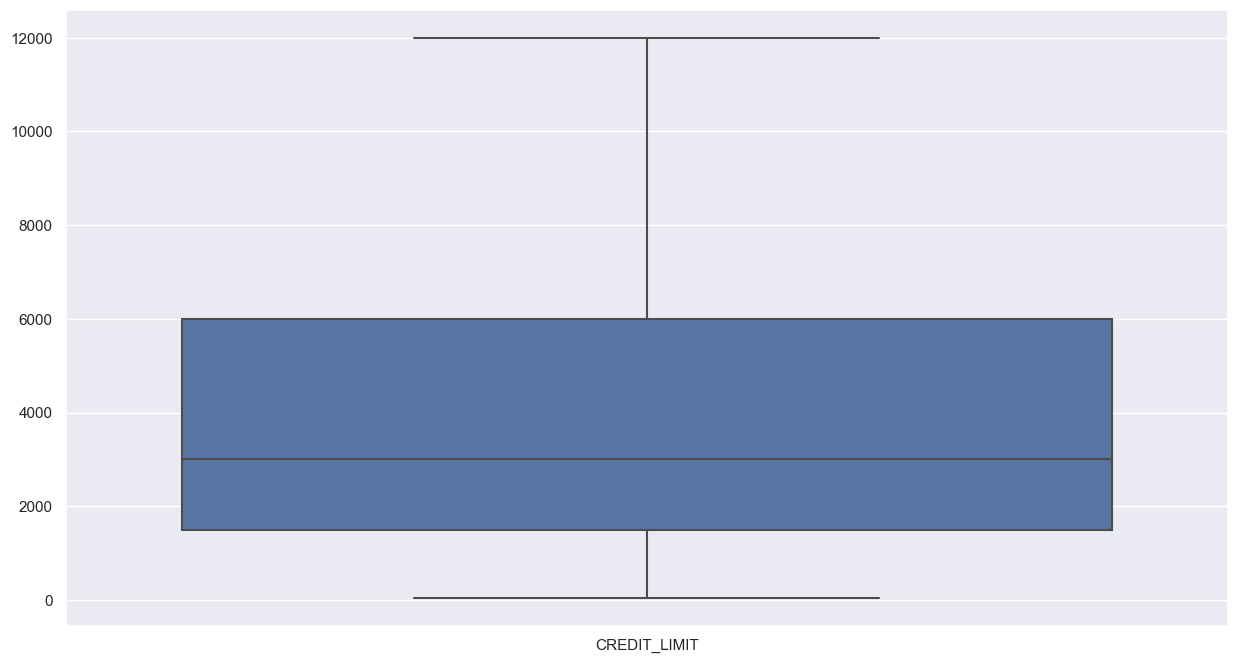

In [161]:
df_copia = df_copia[df_copia['CREDIT_LIMIT'] <= 12000]

name_col_limit = ["CREDIT_LIMIT"]

#Visualización 
fig=plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_copia[name_col_limit], orient="v")

## 3. Modelamiento

### 3.1. Algoritmo 1 - DBSCAN

Este algoritmo lo va a realizar el integrante **Nicolas Diaz Motañana**. El algoritmo de DBSCAN es un algoritmo de agrupamiento, ha diferencia de K-Means, que no requiere especificar el nuemro de clusteres de antemano y tiene la capacidad de identificar clusteres de manera arbitraria y con diferentes tamaños a partir de datos con alto nivel de dimensionalidad.

### 3.1.1. Identificar las variables a utilizar

Antes de empezar volveremos hacer el heatmap con los datos ya preparados, eso significa que ahora estara encluido la columna BALANCE entre los datos y tendremos una relacion clara de como los datos numerico interactuan entre si.

<Axes: >

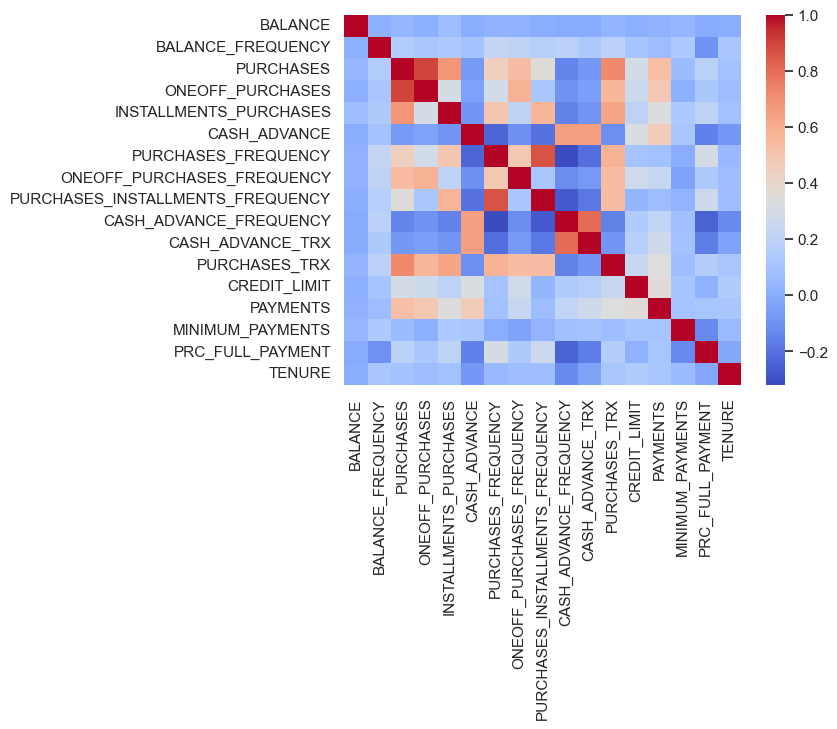

In [162]:
from sklearn.preprocessing import MinMaxScaler

df_copia_cols_sels=df_copia.copy().drop(columns=["CUST_ID", "BALANCE_NORM", "PURCHASES_NORM"])

# Aqui normalizaremos los datos
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_copia_cols_sels), columns=df_copia_cols_sels.columns)

# Se hara una matriz de correlacion para que se puede comparar que tanto se relacionan las columnas entre si
correlation_matrix = normalized_df.corr()

# En esta gráfica de tipo heatmap va mostrar las correlaciones
sns.heatmap(correlation_matrix, cmap='coolwarm')

Las relaciones entre las columnas "ONEOFF_PURCHASES_FREQUENCY" y "PURCHASES_FREQUENCY" nos pueden ayudar a identificar patrones de comportamiento que podrían ser útiles para segmentar a los clientes en grupos específicos y predecir su comportamiento futuro. Además, esta información podría emplearse para desarrollar estrategias de marketing más efectivas y evaluar el impacto de eventos externos en las decisiones de compra de los clientes, facilitando así una comprensión más profunda de sus necesidades y preferencias.

In [163]:
# Empecemos con calma, vamos a ver que se evidenciamos a partir de la 
# seleccion del subconjunto de las siguintes columnas sin normalizar 
# "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_FREQUENCY",
first_model_selec = ["ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_FREQUENCY"]
df_copia_model = df_copia[first_model_selec].copy()

In [164]:
df_copia_model

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY
0,0.000000,0.166667
2,1.000000,1.000000
3,0.083333,0.083333
4,0.083333,0.083333
5,0.000000,0.666667
...,...,...
8956,0.000000,1.000000
8957,0.000000,1.000000
8958,0.000000,0.833333
8959,0.000000,0.000000


### 3.1.2. Construir el modelo

In [165]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normaliza los datos
scaler = StandardScaler()
df_modelo_norm = scaler.fit_transform(df_copia_model)

# Realiza la reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_modelo_pca = pca.fit_transform(df_modelo_norm)

# Crea y entrena el modelo DBSCAN
dbscan = DBSCAN(eps=0.2854, min_samples=3)
dbscan.fit(df_modelo_norm)

print("Etiquetas de los clusters:")
print(dbscan.labels_)

Etiquetas de los clusters:
[0 1 2 ... 0 0 2]


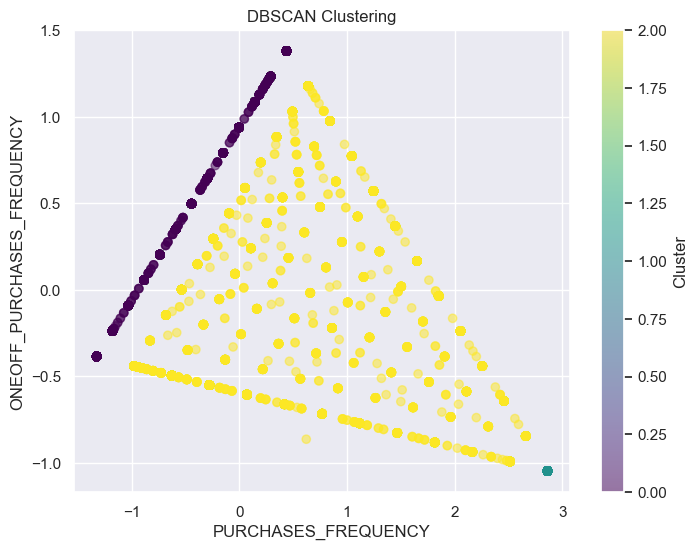

In [166]:
# Visualiza los resultados
plt.figure(figsize=(8, 6))

# Grafica los puntos de datos
plt.scatter(df_modelo_pca[:, 0], df_modelo_pca[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)

# Ajusta los parámetros del gráfico
plt.title('DBSCAN Clustering')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.colorbar(label='Cluster')

plt.show()

### 3.1.3. Visualizar el resultado

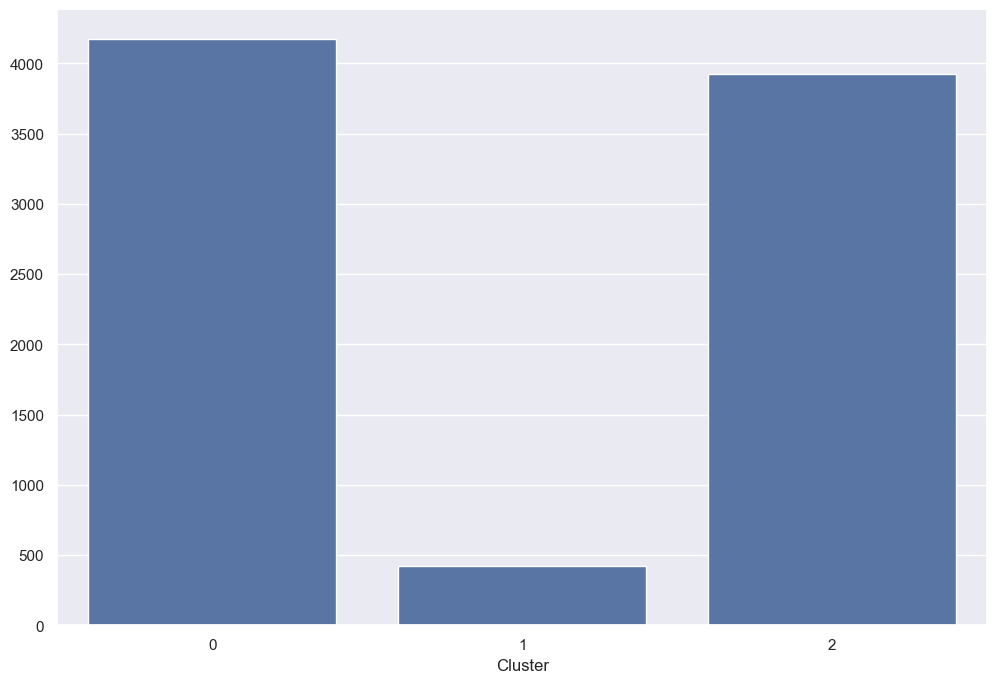

In [167]:
# Revisar la cantidad de registros en los grupos resultado
labels = dbscan.labels_
df_copia_model['Cluster'] = labels

cluster_distrib = df_copia_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [168]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_copia_model.groupby('Cluster').count()

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY
Cluster,,
0,4177,4177
1,421,421
2,3926,3926


In [169]:
#Transformar el contenido de las columnas a arreglo para facilitar aplicar funciones como las de visualización
cols_number = df_copia_model.to_numpy()
cols_number

array([[0.      , 0.166667, 0.      ],
       [1.      , 1.      , 1.      ],
       [0.083333, 0.083333, 2.      ],
       ...,
       [0.      , 0.833333, 0.      ],
       [0.      , 0.      , 0.      ],
       [0.666667, 0.666667, 2.      ]])

In [170]:
df_copia_model

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,Cluster
0,0.000000,0.166667,0
2,1.000000,1.000000,1
3,0.083333,0.083333,2
4,0.083333,0.083333,2
5,0.000000,0.666667,0
...,...,...,...
8956,0.000000,1.000000,0
8957,0.000000,1.000000,0
8958,0.000000,0.833333,0
8959,0.000000,0.000000,0


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


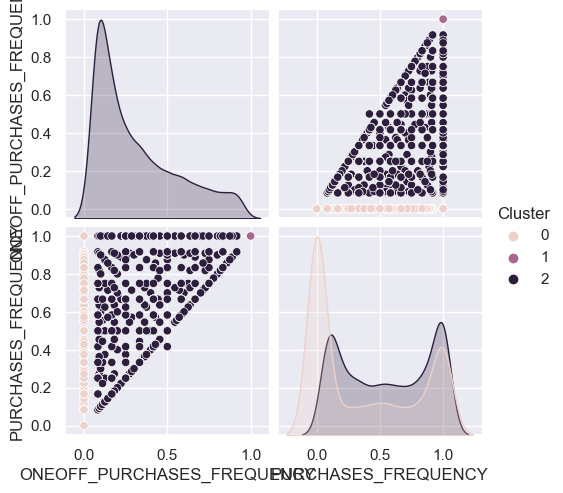

In [171]:
sns.pairplot(data=df_copia_model, hue="Cluster")

### 3.2 K-medoids

### 3.2.1 Construcción del modelo

In [172]:
#Se prepara el dataframe y se interpolan los valores faltantes para evitar los nulos pues K-medoids no puede trabajar con ellos.
df_customer_copy_ag = df_customer.copy()
df_customer_copy_ag.interpolate(inplace=True)
#Se empieza el algoritmo
kmedoids = KMedoids(n_clusters=4, metric='manhattan', random_state=0)
df_customer_copy_ag['cluster'] = kmedoids.fit_predict(df_customer_copy_ag[['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE']])


C:\Users\granj\AppData\Local\Temp\ipykernel_14484\2614168837.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_customer_copy_ag.interpolate(inplace=True)


### 3.2.2 Visualización de los clusters

<Axes: ylabel='cluster'>

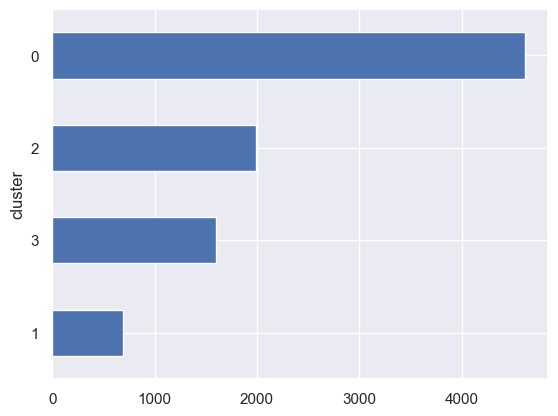

In [173]:
#Se grafican los clusters
df_customer_copy_ag['cluster'].value_counts().sort_values().plot.barh()


### 3.2.2 Visualización del resultado

<Axes: xlabel='CASH_ADVANCE', ylabel='cluster'>

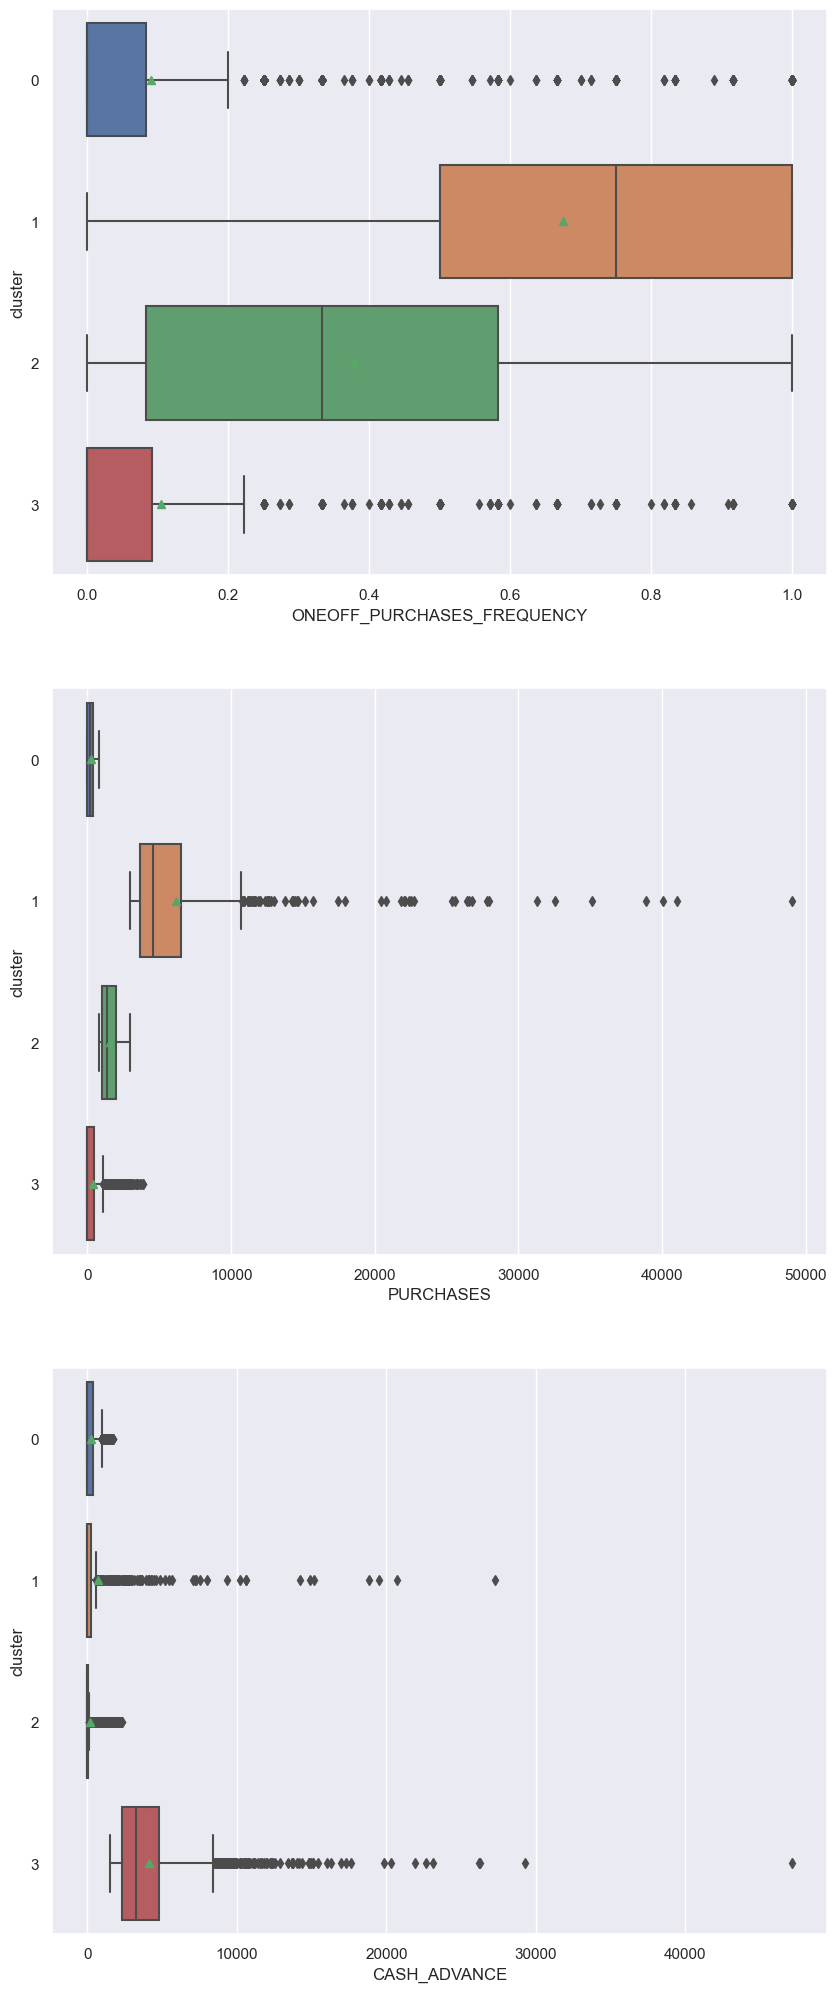

In [174]:
fig, axes = plt.subplots(3, 1, figsize = (10, 25))
sns.boxplot(data = df_customer_copy_ag, x = 'ONEOFF_PURCHASES_FREQUENCY', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = df_customer_copy_ag, x = 'PURCHASES', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
sns.boxplot(data = df_customer_copy_ag, x = 'CASH_ADVANCE', y = 'cluster', showmeans = True, orient = 'h', ax = axes[2])


In [175]:
#Mejor especificación de los clusters
df_customer_copy_ag.iloc[kmedoids.medoid_indices_]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5696,C15843,6.542818,0.571429,178.00,0.00,178.00,0.000000,0.857143,0.000000,0.571429,0.000000,0,6,1500.0,231.111728,19.703002,0.0,7,0
6598,C16768,2933.577644,1.000000,4562.57,3729.83,832.74,0.000000,1.000000,0.750000,0.916667,0.000000,0,88,4000.0,4237.359587,1026.203480,0.0,12,1
717,C10741,821.916526,0.857143,1386.40,1386.40,0.00,0.000000,0.285714,0.285714,0.000000,0.000000,0,3,1500.0,238.348011,154.555561,0.0,7,2
574,C10595,2627.184835,1.000000,0.00,0.00,0.00,3216.192328,0.000000,0.000000,0.000000,0.083333,7,0,3150.0,394.285767,10636.148390,0.0,12,3


### 3.3. Algoritmo 3  K-means

Este algoritmo lo va a realizar el integrante **Julio Alexander Peña Tovar**. El algoritmo de K-means es un algoritmo de agrupamiento. El algoritmo K-Means es un método de agrupamiento de datos que busca dividir un conjunto de observaciones en k grupos homogéneos. Inicia seleccionando k centroides aleatorios y asigna cada observación al centroide más cercano. Luego recalcula los centroides como el promedio de todas las observaciones asignadas a cada grupo. Este proceso se repite iterativamente hasta que los centroides convergen y las asignaciones de grupos no cambian significativamente. Es un algoritmo eficiente y efectivo para la segmentación de datos en grupos con características similares.  

### 3.3.1. Eleccion de la variables

Las variables que vamos a utilizar son las mismas que se usaron previamente para el algoritmo de DB-SCAN, esto con el objetivo de poder hacer una comparativa objetiva de los modelos construidos y los algoritmos usados respectivamente para cada modelo, estas variables son entonces ONEOFF_PURCHASES_FREQUENCY, PURCHASES_FREQUENCY .

In [176]:
#Se crea un dataset especifico para ser usado en el algoritmo de K-means y que no afecte ejecuciones posteriores
df_kmeans = df_customer
variables = ["ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_FREQUENCY" ]

### 3.3.2. Creacion del modelo



Debido a que la columna Purchases_Trx es un promedio y las otras dos variables son porcentajes es necesario normalizar, lo que haremos a continuacion.
 
 

In [177]:
scaler = StandardScaler()
X= scaler.fit_transform(df_kmeans[variables])

In [178]:
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 1)
kmeans.fit(X)

KMeans(init='random', n_clusters=2, n_init=1)

Observamos el numero de iteraciones ejecutadas por k-means

In [179]:
kmeans.n_iter_

3

A continuacion una muestra grafica clara de la distribucion de elementos de los cluster

<Axes: >

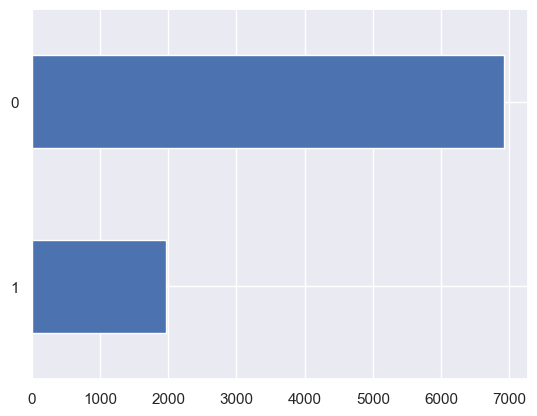

In [180]:
pd.Series(kmeans.labels_).value_counts().sort_values().plot.barh()

Observamos los centros de las agrupaciones

In [181]:
kmeans.cluster_centers_

array([[-0.46648521, -0.28166363],
       [ 1.6413544 ,  0.9910493 ]])

Corremos K-means utilizando  las variables previamente seleccionadas para generar nuestras  agrupaciones.

## Visualizacion del resultado

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: ylabel='cluster'>

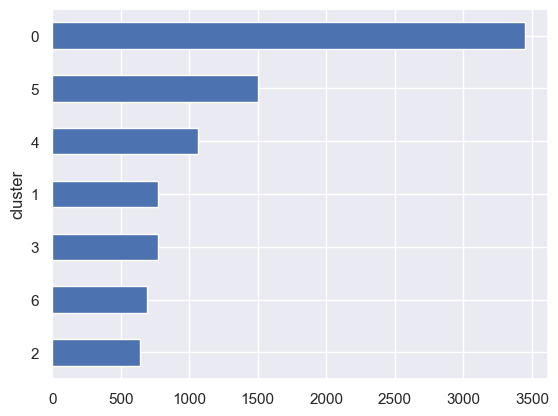

In [182]:
kmeans = KMeans(n_clusters = 7, random_state = 4)
df_kmeans['cluster'] = kmeans.fit_predict(X)
df_kmeans['cluster'].value_counts().sort_values().plot.barh()

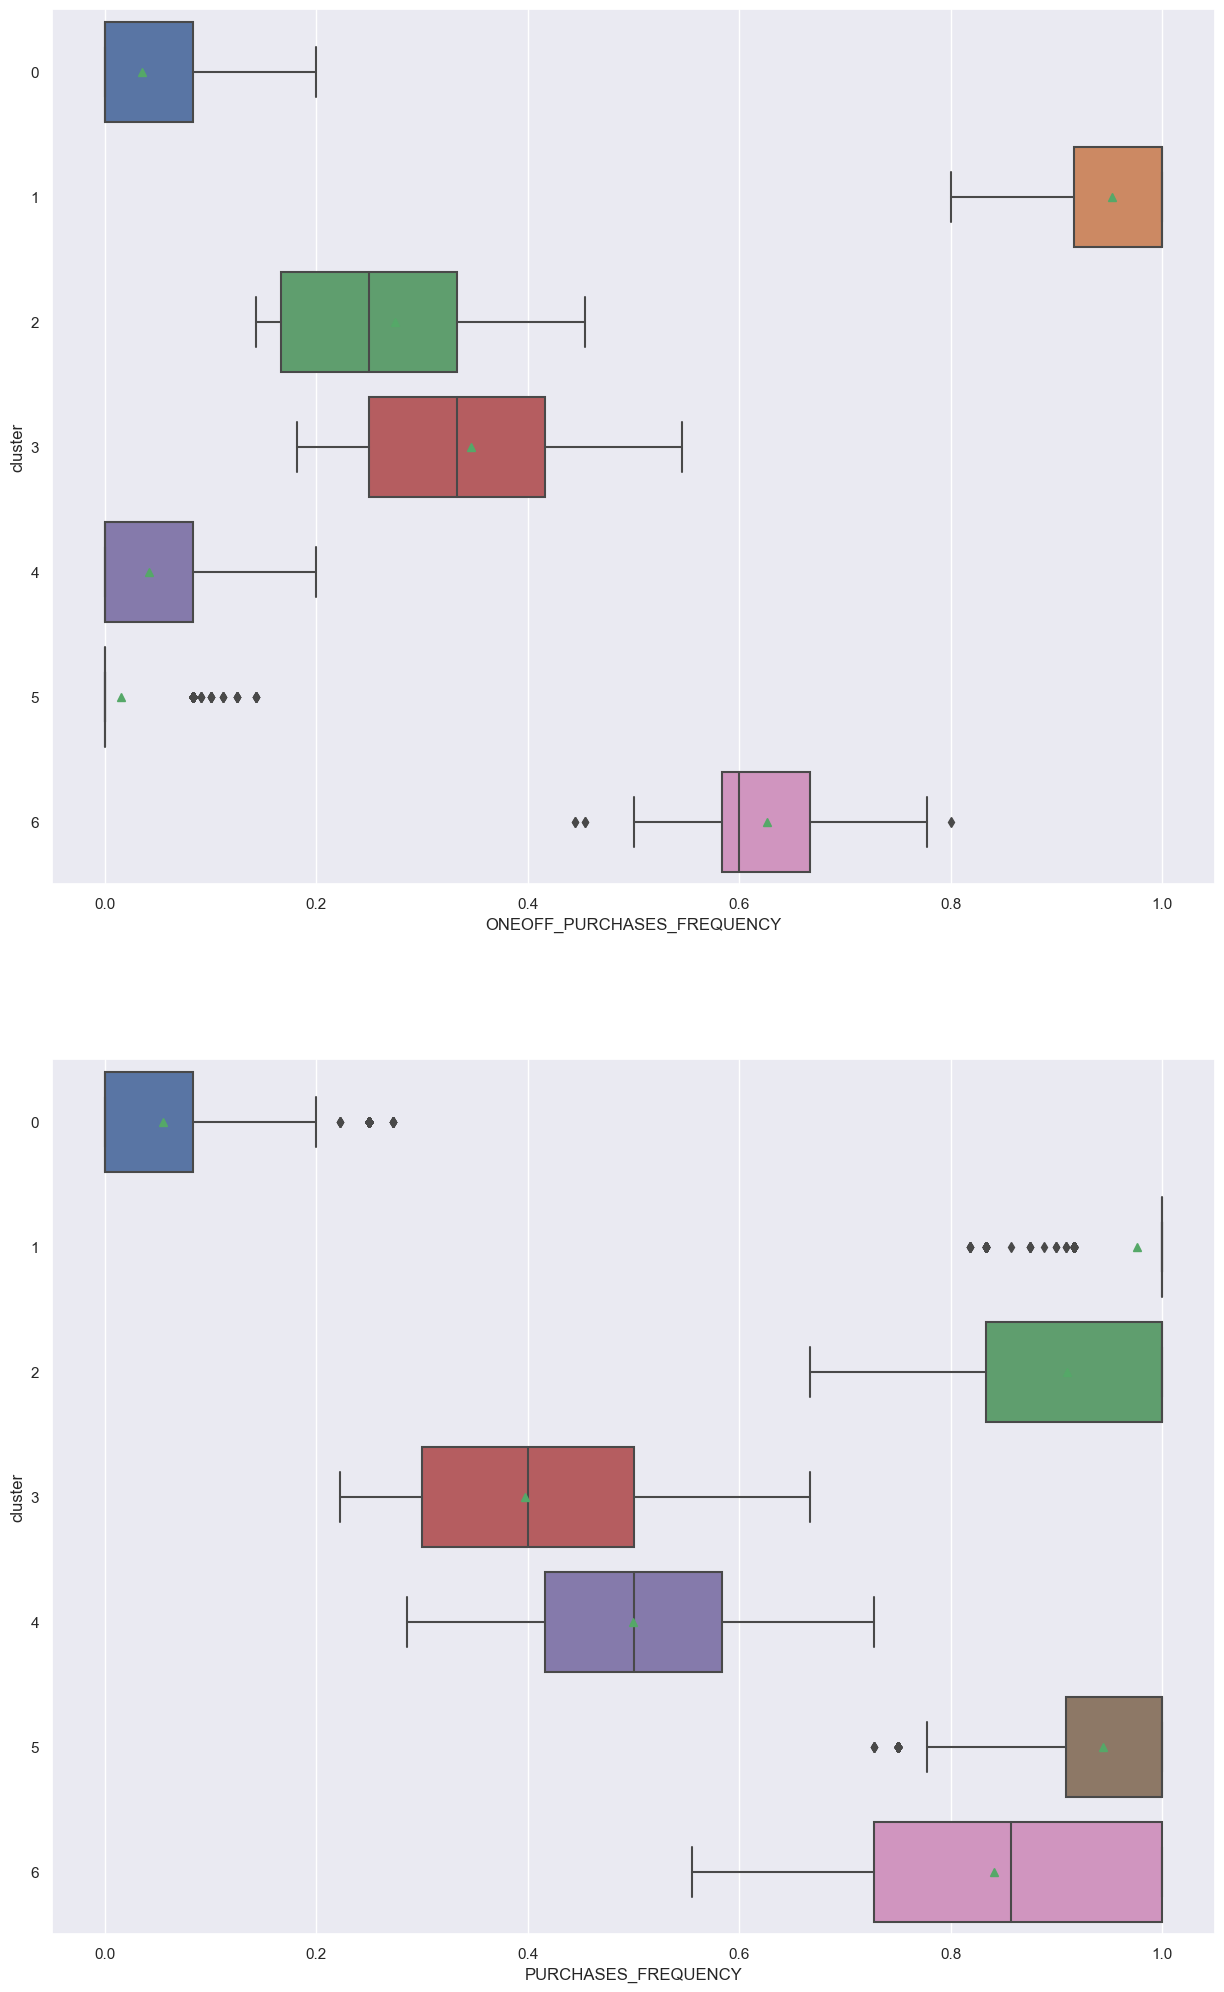

In [183]:
fig, axes = plt.subplots(2, 1, figsize = (15, 25))
sns.boxplot(data = df_kmeans, x = 'ONEOFF_PURCHASES_FREQUENCY', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = df_kmeans, x = 'PURCHASES_FREQUENCY', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
plt.show()

## 4. Validación

### 4.1. DBSCAN

### 4.1.1. Validación cuantitativa.

Se identifican dos tipos de evaluación: cuantitativa y cualitativa. Desde el punto de vista cuantitativo vamos a utilizar la "silueta" que es lo que observamos en la celda siguiente.

In [184]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


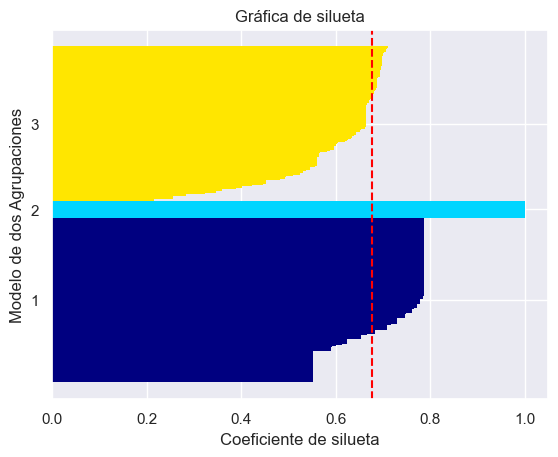

In [185]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_copia_model, 
                labels = dbscan.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

### 4.2. K-means

## 4.2.1 Valiacion cuantitativa
Asignamos un rango para probar el algoritmo de K-means con una cantidad de agrupaciones diferentes. Esto con el objetivo de usar el metodo del codo y encontrar la cantidad de agrupaciones optima

In [186]:
n_clusters = range(2, 24)
kmeans_inertias = []

for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 4)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Metodo del codo

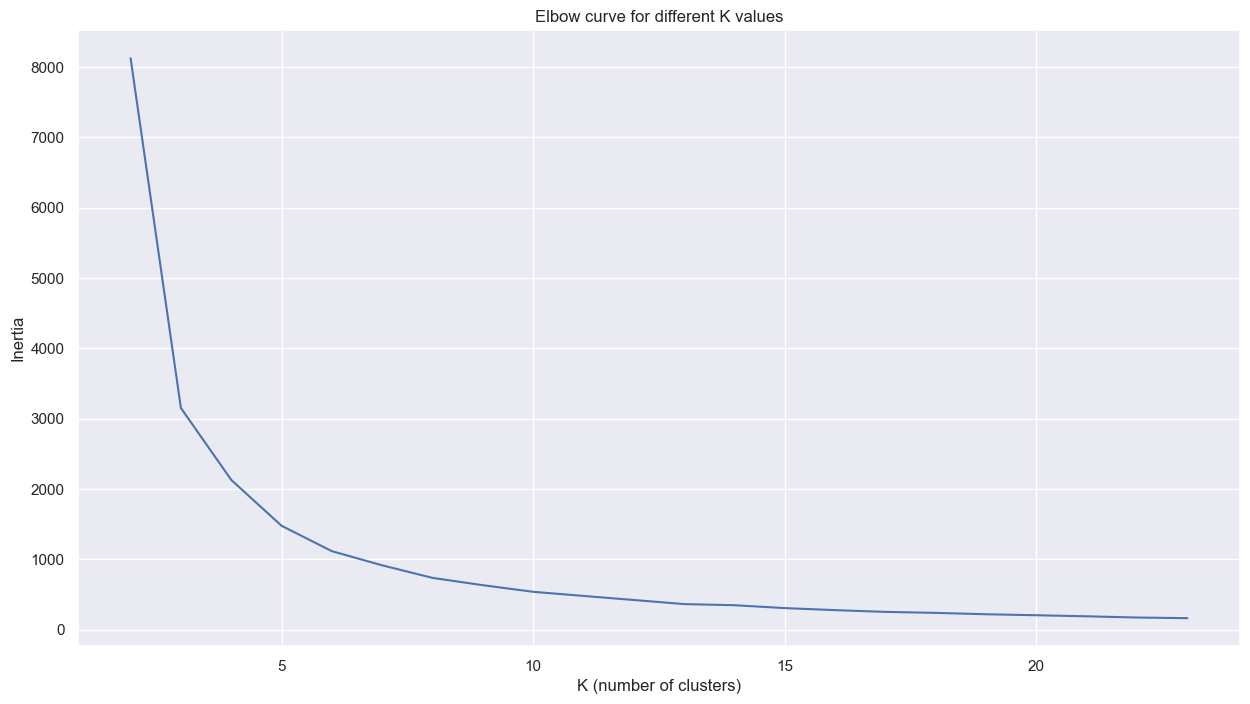

In [187]:
fig = plt.figure(figsize = (15, 8))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

La grafica a continuacion muestra las distribuciones de los diferentes valores que pueden tomar las variables utilizadas en el algoritmo.


### 4.1.2. Validación Cualitativa

Al analizar la correlación entre estas variables, se puede obtener una comprensión más completa del comportamiento de compra de los clientes. En este caso podemos evidenciar que entre la mayoria de clientes prefiere no hacer compras que solo sean de una cuota, lo cual nos puede dejar enteder que tal vez los usuarios no tengan la capacidad financiera para pagar de una vez o puede ser que la empresa este cobrando interes por realizar pagos inmediatos. Ademas, algunos clientes pueden preferir pagar a plazos para aprovechar beneficios financieros adicionales, como programas de recompensas o acumulación de puntos, ofrecidos por las instituciones financieras o comercios. Por otra parte, dividir el pago en cuotas puede ayudar a los clientes a planificar y administrar mejor sus gastos a lo largo del tiempo.